In [1]:
import numpy as np
import scipy.optimize

from matplotlib import pyplot as plt


1.4323320694805262 1.2121212121212122
1.4318398004158324 [1.20844116]


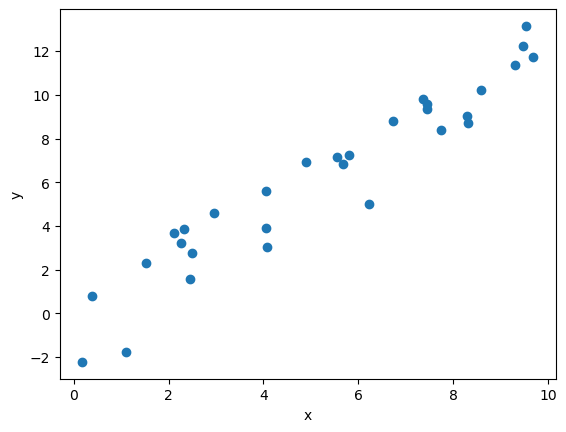

In [2]:
#Generate a linear model and find the best fit 

# Real data
np.random.seed(121)
theta = 1.2
n_samples = 30
x = 10 * np.random.rand(n_samples)  # sample from a uniform distribution over [0,10)
noise = np.random.randn(n_samples)  # sample from a standard normal distribution
y = theta * x + noise

# Plot the results
fig, ax = plt.subplots()
ax.scatter(x, y)  # produces a scatter plot
ax.set(xlabel='x', ylabel='y');


#Parameter estimation

def MSE(theta, x, y):
    N = len(x)
    return 1/N*np.sum((theta*x - y)**2)

def optimize_likelihood(loss_func, theta_i, args):
#    bnds = ((None, None), (0, None))
    bnds = None
    ftol = 10e-6
    res = scipy.optimize.minimize(loss_func, theta_i, args=args, method = 'Nelder-Mead', bounds = bnds, tol = ftol)
    return res.fun, res.x



#Brute force
tt = np.linspace(0,1.5,100)
mse = [MSE(tt[i],x,y) for i in range(len(tt))]
brute_force_theta = tt[np.argmin(mse)]


#Unconstrained optimization 
args= (x,y)
fun , params = optimize_likelihood(MSE, 1, args)

# Bootstrap estimates
def resample_with_replacement(x, y):    
    indxs = np.random.choice(range(len(x)), len(x))    
    x_ = x[indxs]
    y_ = y[indxs]    
    return x_, y_

def bootstrap(x, y, n=2000):
    vals, params = np.zeros(n), np.zeros(n)
    for j in range(n):
        x_,y_ = resample_with_replacement(x, y)
        args= (x_,y_)
        vals[j] , params[j] = optimize_likelihood(MSE, 1, args)
    return vals, params
    

print(MSE(brute_force_theta,x,y), brute_force_theta)
print(fun,params)

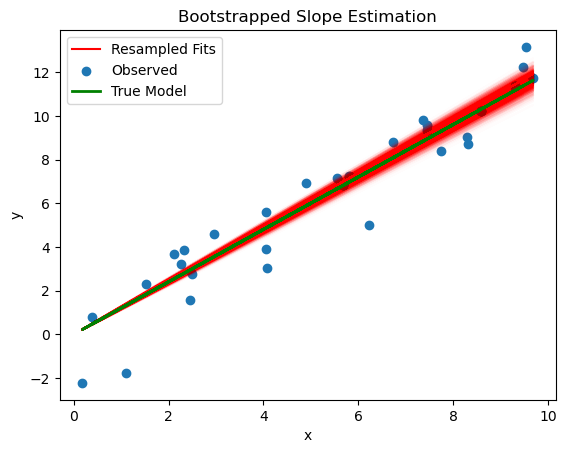

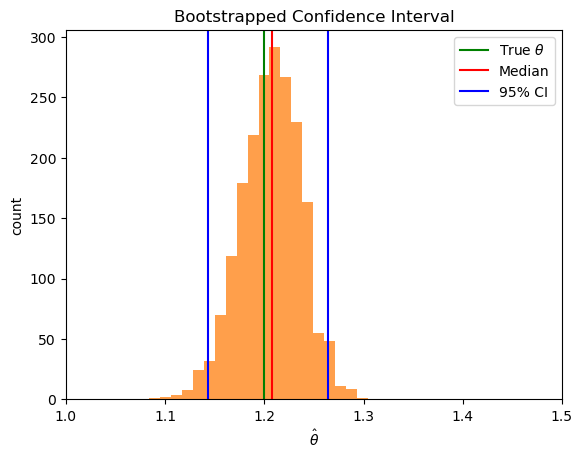

In [3]:
#Plots for bootstrap
    
fig, ax = plt.subplots()

# For each theta_hat, plot model
fun, theta_hats = bootstrap(x, y, n=2000)
for i, theta_hat in enumerate(theta_hats):
    y_hat = theta_hat * x
    ax.plot(x, y_hat, c='r', alpha=0.01, label='Resampled Fits' if i==0 else '')

# Plot observed data
ax.scatter(x, y, label='Observed')

# Plot true fit data
y_true = theta * x
ax.plot(x, y_true, 'g', linewidth=2, label='True Model')

ax.set(
  title='Bootstrapped Slope Estimation',
  xlabel='x',
  ylabel='y'
)

# Change legend line alpha property
handles, labels = ax.get_legend_handles_labels()
handles[0].set_alpha(1)

ax.legend()
plt.show()


fig, ax = plt.subplots()
ax.hist(theta_hats, bins=20, facecolor='C1', alpha=0.75)
ax.axvline(theta, c='g', label=r'True $\theta$')
ax.axvline(np.percentile(theta_hats, 50), color='r', label='Median')
ax.axvline(np.percentile(theta_hats, 2.5), color='b', label='95% CI')
ax.axvline(np.percentile(theta_hats, 97.5), color='b')
ax.legend()
ax.set(
    title='Bootstrapped Confidence Interval',
    xlabel=r'$\hat{{\theta}}$',
    ylabel='count',
    xlim=[1.0, 1.5]
)
plt.show()

In [ ]:
#Generate a multilinear model and find the best fit 
#TO DO : Make it into a class 


# Set random seed for reproducibility
np.random.seed(1234)

# Set parameters
theta_i = [0, -2, -3]
n_samples = 40

# Draw x and calculate y
n_regressors = len(theta_i)
x = np.random.uniform(-2, 2, (n_samples, n_regressors))
noise = np.random.randn(n_samples)
y = np.dot(x,theta_i) + noise

def MSE(theta_i, x, y):
    N = len(x)
    return 1/N*np.sum((x @ theta_i - y)**2)

def optimize_likelihood(loss_func, theta_i, args):
#    bnds = ((None, None), (0, None))
    bnds = None
    ftol = 10e-6
    res = scipy.optimize.minimize(loss_func, theta_i, args=args, method = 'Nelder-Mead', bounds = bnds, tol = ftol)
    return res.fun, res.x



#Unconstrained optimization 
args= (x,y)
params_0 = [1,1,1]
fun , params = optimize_likelihood(MSE, params_0, args)
print(params)

# Bootstrap estimates
def resample_with_replacement(x, y):    
    indxs = np.random.choice(range(len(x)), len(x))    
    x_ = x[indxs]
    y_ = y[indxs]    
    return x_, y_

def bootstrap(x, y, n=2000):
    vals, params = np.zeros(n), np.zeros((n,x.shape[1]))
    for j in range(n):
        x_,y_ = resample_with_replacement(x, y)
        args= (x_,y_)
        vals[j] , params[j] = optimize_likelihood(MSE, params_0, args)
    return vals, params


fun, theta_hats = bootstrap(x, y, n=2000)


In [15]:
#Generate a polynomial model and find the best fit 
#TO DO: Make it into a class 


### Generate training data
np.random.seed(0)
n_train_samples = 50
x_train = np.random.uniform(-2, 2.5, n_train_samples) # sample from a uniform distribution over [-2, 2.5)
noise = np.random.randn(n_train_samples) # sample from a standard normal distribution
y_train =  x_train**2 - x_train - 2 + noise

### Generate testing data
n_test_samples = 20
x_test = np.random.uniform(-3, 3, n_test_samples) # sample from a uniform distribution over [-3, 3)
noise = np.random.randn(n_test_samples) # sample from a standard normal distribution
y_test =  x_test**2 - x_test - 2 + noise


x = np.zeros((n_samples,highest_rank+1))
x_b = np.random.uniform(-2, 2, (n_samples))
for k in range(highest_rank+1):
    x[:,k] = x_b**k
    
noise = np.random.randn(n_samples)
y = np.dot(x,theta_i) + noise

def MSE(theta_i, x, y):
    N = len(x)
    return 1/N*np.sum((x @ theta_i - y)**2)

def optimize_likelihood(loss_func, theta_i, args):
#    bnds = ((None, None), (0, None))
    bnds = None
    ftol = 10e-6
    res = scipy.optimize.minimize(loss_func, theta_i, args=args, method = 'Nelder-Mead', bounds = bnds, tol = ftol)
    return res.fun, res.x



#Unconstrained optimization 
args= (x,y_test)
params_0 = [1,1,1,1]
fun , params = optimize_likelihood(MSE, params_0, args)
print(params)

# Bootstrap estimates
def resample_with_replacement(x, y):    
    indxs = np.random.choice(range(len(x)), len(x))    
    x_ = x[indxs]
    y_ = y[indxs]    
    return x_, y_

def bootstrap(x, y, n=2000):
    vals, params = np.zeros(n), np.zeros((n,x.shape[1]))
    for j in range(n):
        x_,y_ = resample_with_replacement(x, y)
        args= (x_,y_)
        vals[j] , params[j] = optimize_likelihood(MSE, params_0, args)
    return vals, params


fun, theta_hats = bootstrap(x, y, n=2000)


[-0.17838964 -2.37492448 -2.7830689  -3.8618066 ]


In [16]:
from sklearn.model_selection import KFold
